In [5]:
!pip install nltk

     |████████████████████████████████| 1.5MB 721kB/s eta 0:00:01     |██████████████████████████▋     | 1.2MB 721kB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449909 sha256=6ce3d470c3c0579c33ef70995cbee267d63b93c4284bad879c56dd01c453ae46
  Stored in directory: /home/jovyan/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


In [2]:

import nltk 

nltk.download('stopwords')
from nltk import FreqDist
from nltk.corpus import brown
import pandas as pd
import matplotlib as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rosalindkidwell/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Need to gather all data into a long text string.We want to use df['comment'] for our comments. 

df = pd.read_csv('data/Comments/combined-comments.csv')

#titles = df['title']
#body = df['body']
print(df)
comments = df['comment']

     Unnamed: 0                                            comment  \
0             0  Founded in 2017, GoChain started with an idea ...   
1             1                     i would like to learn that too   
2             2  TLDR margin means you borrow money to trade, y...   
3             3  A nice short answer, thanks! Two follow-up que...   
4             4  Yes 3x means  3 times of your asset value.\nEg...   
...         ...                                                ...   
6997         69                  Traffic of what site?\n\n&#x200B;   
6998         70  Ok yeah huge decrease in a year, but where exa...   
6999         71                                     This subreddit   
7000         72                                Got it thanks mate.   
7001                                                          NaN   

      Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  
0            NaN         NaN         NaN         NaN         NaN         NaN  
1

In [9]:
nltkprep_com = comments.str.cat(sep='; ')

In [12]:
#Right now, this divides it into sentences. We want to remove stopwords first 
from nltk.tokenize import RegexpTokenizer

#We want to remove all punctuation from each word. Or else .,? would be the most frequent occurrences
tokenizer = RegexpTokenizer(r'\w+')


tokenized_text = tokenizer.tokenize(nltkprep_com)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['I', 'https', 'like', 'this', 'you', 'com', 'www', 'The', 'You'])


print(len(tokenized_text))
filtered_tokenized_text = [word for word in tokenized_text if word not in stopwords]
print(len(filtered_tokenized_text))

filtered_word_freq = nltk.FreqDist(filtered_tokenized_text)
#filtered_word_freq = nltk.FreqDist(tokenized_text)
filtered_word_freq

words = filtered_word_freq.keys()

#print(words)

print(len(words))



266774
147064
16194


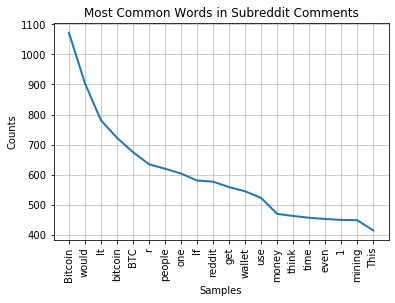

In [13]:
ax = filtered_word_freq.plot(20, title = 'Most Common Words in Subreddit Comments')

ax

In [62]:
#But what if we removed the stopwords to measure masculine/feminine pronouns? Let's look at the example below.

tokenizer = RegexpTokenizer(r'\w+')
tokenized_text = tokenizer.tokenize(nltkprep_com)

#print(len(tokenized_text))

filtered_tokenized_text = [word for word in tokenized_text]
#print(filtered_tokenized_text)
filtered_word_freq = nltk.FreqDist(filtered_tokenized_text)
filtered_word_freq

words = filtered_word_freq.keys()


print(len(words))

dict = {
    'he':filtered_word_freq['he'] / len(tokenized_text),
    'him':filtered_word_freq['him']/ len(tokenized_text),
    'his':filtered_word_freq['his']/ len(tokenized_text),
    'she':filtered_word_freq['she']/ len(tokenized_text),
    'her':filtered_word_freq['her']/ len(tokenized_text),
    'hers':filtered_word_freq['hers']/ len(tokenized_text) 
    }
                             
print(filtered_word_freq['man'])

subject_gender = {}
    
for key in filtered_word_freq.keys():
    if key[-3:] == 'man':
        subject_gender[key] = filtered_word_freq[key]
    elif key[:3] == 'man':
        subject_gender[key] = filtered_word_freq[key]

fluff_words = ['german', 'human', 'Batman', 'Goldman', 'Smittywerbenjagerman', 'Roman', 'German']


subject_gender

16348
57


{'manches': 1,
 'many': 247,
 'manipulated': 21,
 'manipulation': 16,
 'manners': 3,
 'manually': 6,
 'manual': 1,
 'manage': 12,
 'managing': 3,
 'manipulating': 2,
 'man': 57,
 'managed': 10,
 'manner': 13,
 'german': 3,
 'manipulable': 1,
 'manager': 3,
 'human': 9,
 'manufacturers': 3,
 'manages': 3,
 'manufacturer': 4,
 'Batman': 1,
 'manipulations': 3,
 'manipulate': 14,
 'manipulative': 1,
 'manipulators': 3,
 'Goldman': 3,
 'woman': 6,
 'businessman': 1,
 'Smittywerbenjagerman': 1,
 'mantra': 2,
 'manufacture': 4,
 'middleman': 2,
 'mandatory': 3,
 'salesman': 2,
 'mans': 1,
 'Roman': 1,
 'management': 5,
 'Chairman': 5,
 'strawman': 1,
 'manufacturing': 4,
 'Hirchman': 1,
 'mansion': 1,
 'hitman': 4,
 'mania': 3,
 'German': 1,
 'Caveman': 1,
 'manufactor': 1}